## Analyse Explatoire du jeu de données

### Analyse des canaux de ventes

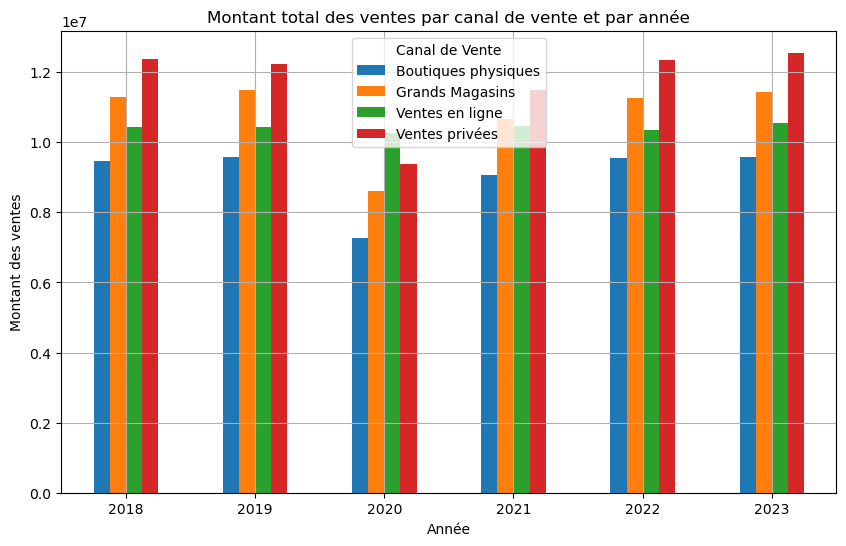

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
sell_data = pd.read_csv('data/vente_luxe2.csv', sep=',')
sell_data.describe()



pivot_data = sell_data.pivot_table(values='Montant des ventes', index='Année', columns='Canal de vente', aggfunc='sum')

# Plot the pivot table as a grouped bar chart
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Montant total des ventes par canal de vente et par année')
plt.xlabel('Année')
plt.ylabel('Montant des ventes')
plt.xticks(rotation=0)
plt.legend(title='Canal de Vente')
plt.grid()

# Show the plot
plt.show()



Le graphique présente le montant total des ventes pour quatre canaux de vente (Boutiques physiques, Grands Magasins, Ventes en ligne, Ventes privées) sur la période de 2018 à 2023.

- **Ventes privées** : Canal dominant chaque année avec un montant de ventes au-dessus de 1,2 × 10⁷.
- **Grands Magasins** : Ventes stables et légèrement inférieures aux Ventes privées.
- **Ventes en ligne** : Forte augmentation en 2020, possiblement liée à la transition vers l’e-commerce, atteignant presque les niveaux des canaux principaux.
- **Boutiques physiques** : Montant de ventes le plus bas mais reste stable avec une légère augmentation chaque année.

### Conclusion

Les données montrent une stabilité pour les canaux traditionnels (Boutiques physiques et Grands Magasins), tandis que les ventes en ligne connaissent un pic en 2020, probablement en réponse à la pandémie. Cela reflète un changement dans les habitudes d'achat vers l’e-commerce.

### Saisonnalité des Ventes par Canal

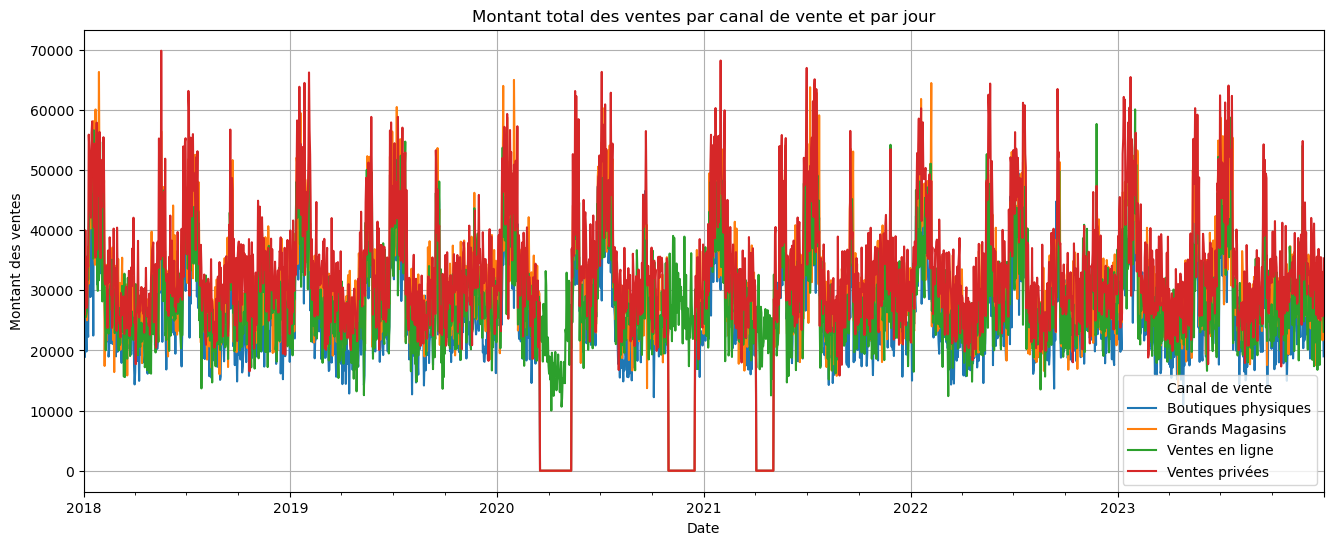

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

sell_data = pd.read_csv('data/vente_luxe2.csv', sep=',')

# Convert 'Date' to datetime format and set it as the index
sell_data['Date'] = pd.to_datetime(sell_data['Date'])
sell_data = sell_data.set_index('Date')

# Group by date and channel, then plot the daily sales by channel as a line chart
daily_sales = sell_data.groupby(['Date', 'Canal de vente'])['Montant des ventes'].sum().unstack()
daily_sales.plot(kind='line', figsize=(16, 6))

# Set title and labels
plt.title('Montant total des ventes par canal de vente et par jour')
plt.xlabel('Date')
plt.ylabel('Montant des ventes')

# Show legend with added label

plt.grid()

# Show the plot
plt.show()

Le graphique montre le montant total des ventes par canal (Boutiques physiques, Grands Magasins, Ventes en ligne, Ventes privées) de manière quotidienne entre 2018 et 2023. Une **saisonnalité claire** est visible, avec des pics récurrents sur chaque année. Ces fluctuations saisonnières indiquent des périodes de forte demande, possiblement en lien avec des événements spéciaux ou des périodes de fêtes.

Les ventes suivent un schéma saisonnier constant, avec des périodes de hausse significative, influençant tous les canaux de vente.

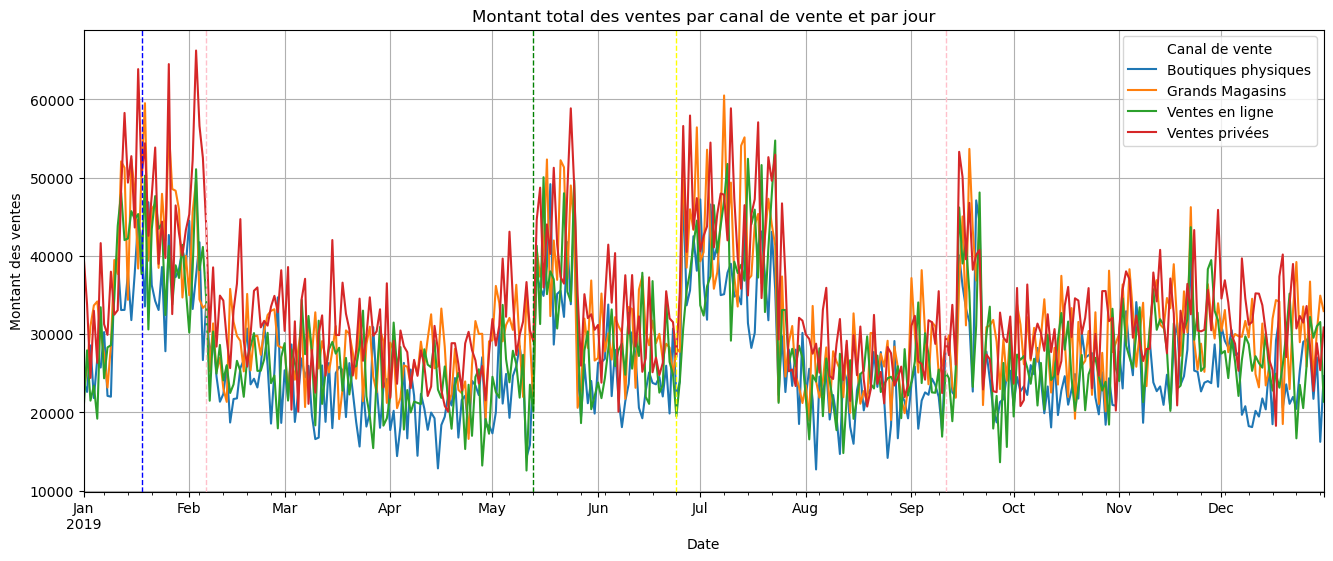

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of dates and their corresponding labels
important_dates = [
  #  ('2019-02-24', 'Black Friday 2018', 'black'),
    ('2019-01-18', 'Semaine de la Mode Paris Hiver', 'blue'),
    ('2019-02-06', 'Nouvel An 2018', 'Pink'),
    ('2019-09-11', 'Nouvel An 2018', 'pink'),
    ('2019-05-13', 'YSL', 'green'),
    ('2019-06-24', 'Fashion week paris automne hiver', 'yellow')

   

    
]

sell_data = pd.read_csv('data/vente_luxe2.csv', sep=',')

# Convert 'Date' to datetime format and set it as the index
sell_data['Date'] = pd.to_datetime(sell_data['Date'])
sell_data = sell_data.set_index('Date')
# Filter data for the year 2019
sell_data = sell_data[sell_data.index.year == 2019]

# Group by date and channel, then plot the daily sales by channel as a line chart
daily_sales = sell_data.groupby(['Date', 'Canal de vente'])['Montant des ventes'].sum().unstack()
daily_sales.plot(kind='line', figsize=(16, 6))




# Loop through the list and add a vertical line for each date
for date, label, color in important_dates:
    plt.axvline(x=pd.Timestamp(date), color=color, linestyle='--', linewidth=1, label=label)
    #plt.text(pd.Timestamp(date), 100 * 0.9, label, color=color, ha="right", fontsize=10)

# Add a vertical line for Christmas 2019


# Set title and labels
plt.title('Montant total des ventes par canal de vente et par jour')
plt.xlabel('Date')
plt.ylabel('Montant des ventes')

# Show legend with added label

plt.grid()

# Show the plot
plt.show()

## Événements Horlogerie et Joaillerie 2025

### **Bijorhca Paris** *(Blue)*  
- **Description** : Salon international de l’horlogerie, de la bijouterie et des accessoires de mode.  
- **Dates** : Du **18 au 20 janvier 2025**.  
- **Lieu** : Paris Expo Porte de Versailles.  
- **Source** : Events Eye.  

---

### **New York Fashion Week** *(Pink)*  
- **Automne/Hiver 2025** : Du **6 au 11 février 2025**.  
- **Printemps/Été 2026** : Du **11 au 16 septembre 2025**.  
- **Source** : Fashion Week Online.  

---

## Autres événements

### **Exposition Yves Saint Laurent** *(green)*  
- Jusqu’au **13 mai 2024**.  

### **Automne-Hiver 2024-2025 à Paris** *(yellow)*  
- Du **lundi 24 au jeudi 27 juin 2024**.  



Lors de l'approche de défile de mode les ventes doubles par rapport au reste du temps.
Hors période de défilé, nous sommes à 250000 ventes par jours et par catégorie, pedant les période de défilé le chiffre double.
Les saisons influent aussi les ventes avec des pic au début de chaque nouvelle saisons dû aux changements de saisons. 


### Graphique des évènements spéciaux par catégorie 

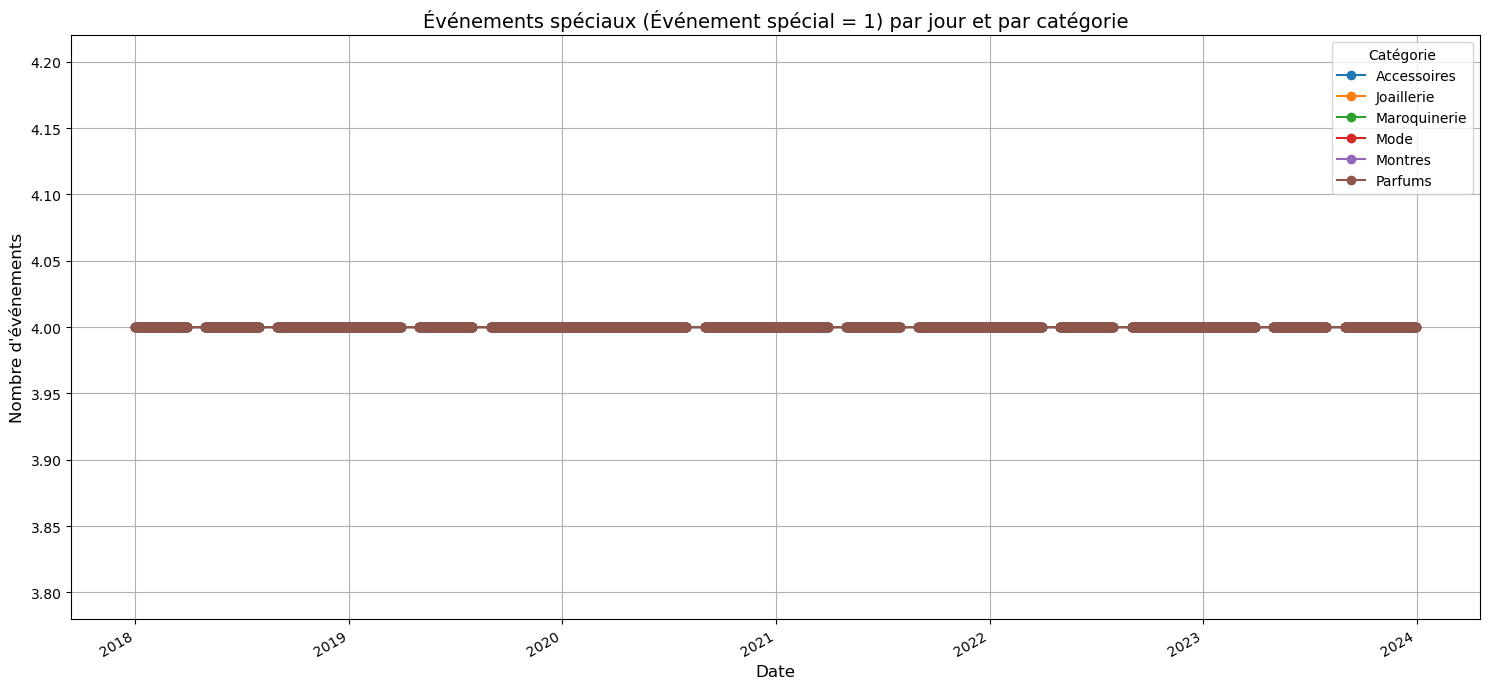

In [77]:
import matplotlib.pyplot as plt
data = pd.read_csv('data/vente_luxe2.csv', sep=',')
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data where 'Événement spécial' equals 1
filtered_data = data[data['Événement spécial'] == 1]
filtered_data = data[data['Événement spécial'] == 1]
# Group by Date and Catégorie and count the occurrences
event_counts = filtered_data.groupby(['Date', 'Catégorie']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = event_counts.pivot(index='Date', columns='Catégorie', values='Count').fillna(0)

# Plot the data
pivot_data.plot(figsize=(15, 7), marker='o')
plt.title('Événements spéciaux (Événement spécial = 1) par jour et par catégorie', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Nombre d\'événements', fontsize=12)
plt.legend(title='Catégorie', fontsize=10)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

L'ensembles des evenements spéciaux pour chaque type d'accessoire se déroule en même temps et est horizontale.
Les evenements spéciaux se déroule toute l'année leurs efficacité n'est pas prouvé.


Conclusion :

Les évènements n'influent pas les ventes de produits de luxe

### Analyse des Ventes par Canal et Catégorie lors d'Événements Spéciaux

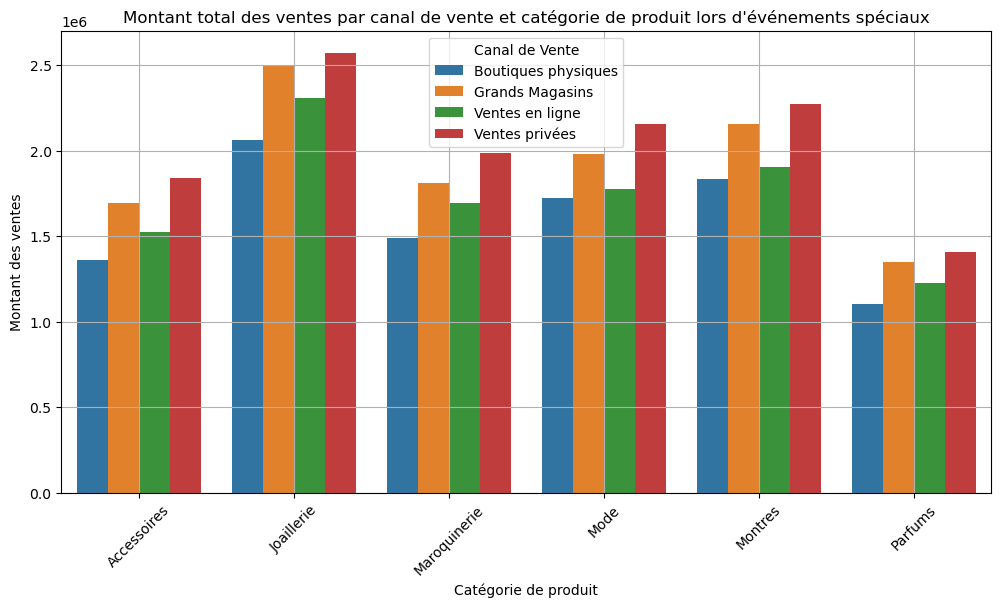

In [66]:
# Attempt a final replot with alternative data handling, ensuring compatibility
import seaborn as sns

# Prepare data for plotting with seaborn for better control
special_event_data_grouped = sell_data.groupby(['Catégorie', 'Canal de vente'])['Montant des ventes'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=special_event_data_grouped, x='Catégorie', y='Montant des ventes', hue='Canal de vente')
plt.title("Montant total des ventes par canal de vente et catégorie de produit lors d'événements spéciaux")
plt.xlabel("Catégorie de produit")
plt.ylabel("Montant des ventes")
plt.xticks(rotation=45)
plt.legend(title="Canal de Vente")
plt.grid()

plt.show()




Le graphique présente les ventes par canal pour différentes catégories de produits pendant des événements spéciaux.



- **Bijouterie** : Catégorie la plus rentable, dominée par les **Ventes privées** et **Boutiques physiques**.
- **Maroquinerie** et **Mode** : Bons résultats, surtout via les **Grands Magasins** et les **Ventes privées**.
- **Accessoires** et **Montres** : Performants avec un focus sur les **Ventes privées**.
- **Parfums** : Moins rentable, mais équilibré entre canaux avec une préférence pour les **Boutiques physiques** et **Ventes privées**.


Les produits de luxe performent mieux via les Ventes privées et Grands Magasins, montrant l'importance du canal de vente selon la catégorie de produit.

### Nombre d'Événements Spéciaux par Catégorie de Produit


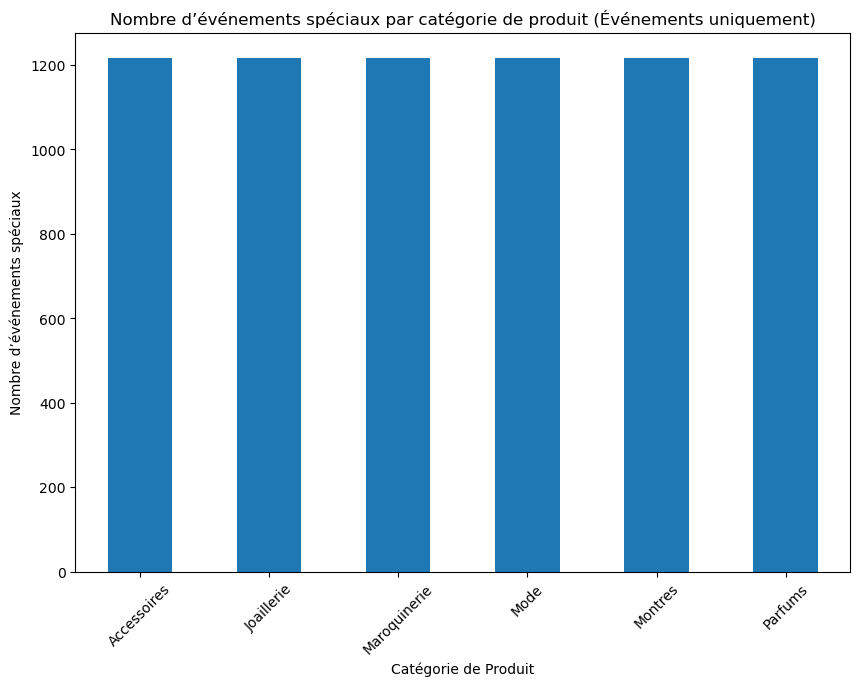

In [67]:
# Filter the data to include only rows with special events (Événement_Spécial = 1)
event_counts_by_category_special_only = sell_data[sell_data['Événement spécial'] == 1].groupby('Catégorie').size()

# Plot the results
plt.figure(figsize=(10, 7))
event_counts_by_category_special_only.plot(kind='bar')
plt.title('Nombre d’événements spéciaux par catégorie de produit (Événements uniquement)')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Nombre d’événements spéciaux')
plt.xticks(rotation=45)
plt.show()



Ce graphique montre le nombre d'événements spéciaux pour chaque catégorie de produit. Tous les types de produits (Accessoires, Joaillerie, Maroquinerie, Mode, Montres, Parfums) comptabilisent environ **1200 événements** chacun, indiquant une répartition équilibrée des événements spéciaux entre les catégories.


La fréquence des événements spéciaux est uniforme pour toutes les catégories de produits.

### Nombre d'Événements Spéciaux par Canal de Vente

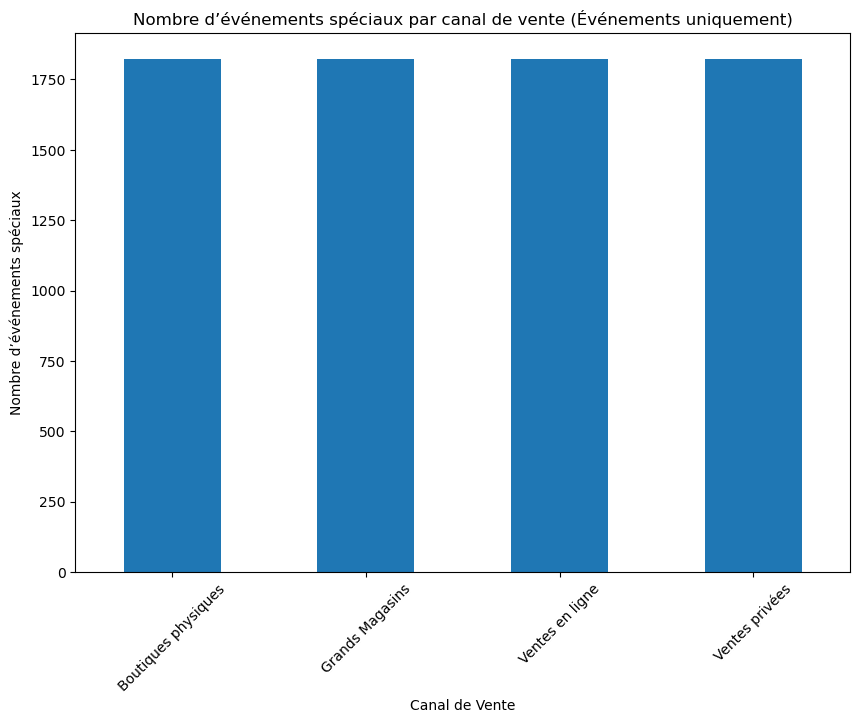

In [68]:
# Filter the data to include only rows with special events (Événement_Spécial = 1) and group by sales channel
event_counts_by_channel_special_only = sell_data[sell_data['Événement spécial'] == 1].groupby('Canal de vente').size()

# Plot the results
plt.figure(figsize=(10, 7))
event_counts_by_channel_special_only.plot(kind='bar')
plt.title('Nombre d’événements spéciaux par canal de vente (Événements uniquement)')
plt.xlabel('Canal de Vente')
plt.ylabel('Nombre d’événements spéciaux')
plt.xticks(rotation=45)
plt.show()


Le graphique montre le nombre d'événements spéciaux par canal de vente (Boutiques physiques, Grands Magasins, Ventes en ligne, Ventes privées). Chaque canal comptabilise environ **1750 événements**, indiquant une répartition homogène des événements spéciaux entre les différents canaux de vente.

Tous les canaux de vente participent de manière égale aux événements spéciaux.

## Gestion des stocks

Pour répondre efficacement à la demande tout en optimisant les stocks, il est crucial de s’adapter aux fluctuations saisonnières et aux variations rapides des mouvements de stock. Voici les recommandations :
	1.	Augmentation des stocks saisonniers : Prévoir une hausse de 20 % des stocks au début de chaque saison (mars, juin, septembre, décembre) pour anticiper l’augmentation des ventes.
	2.	Gestion des Fashion Weeks : Durant ces événements, le volume quotidien des ventes double, passant de 250 000 à 500 000 unités. Il est essentiel de s’assurer que les stocks sont suffisants pour répondre à cette forte demande.

En prenant en compte ces deux facteurs, il devient possible de planifier les réapprovisionnements de manière optimale, en déterminant les dates clés et les volumes nécessaires pour éviter les ruptures de stock.


## Stratégie marketing

Les périodes creuses, identifiées comme les moments sans défilés ni débuts de saison, représentent une opportunité pour stimuler les ventes à travers des campagnes publicitaires ciblées. Voici les recommandations stratégiques :
	1.	Dynamiser les périodes creuses : Lancer des campagnes promotionnelles ou publicitaires durant ces phases afin de compenser la baisse naturelle des ventes.
	2.	Créer des défilés stratégiques : Organiser des défilés au début de chaque saison pour maximiser l’impact combiné des deux événements sur les ventes, tout en renforçant l’engouement autour des nouvelles collections.

Ces approches permettront de lisser les variations de ventes tout en renforçant la visibilité et la notoriété de la marque.

## Avantage Concurentiel 

Pour créer un véritable avantage concurrentiel, il serait judicieux d’organiser les défilés des marques au lancement de chaque saison. Cela permettrait d’être parmi les premiers à commercialiser des produits adaptés aux conditions climatiques actuelles.

En effet, les défilés actuellement décalés par rapport aux saisons ne maximisent pas leur impact sur les consommateurs. Ces derniers, confrontés à un décalage entre les collections présentées et leurs besoins saisonniers, peuvent perdre l’envie de consommer immédiatement, ce qui réduit l’élan d’achat impulsif et risque de provoquer une lassitude.

Aligner les défilés avec le début des saisons offrirait une expérience plus cohérente et engageante pour les clients, tout en renforçant l’efficacité des lancements commerciaux. Cela renforcerait également la perception d’une marque en phase avec les attentes et le rythme de vie de ses consommateurs.